# 테마주 지수 만들기

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [67]:
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

In [68]:
import FinanceDataReader as fdr

stocklst = fdr.StockListing('KRX')  # stocklst = 한국 전체 주식
stocklst.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [52]:
company_fire = [
# 장마 테마주
'파라텍', 
'현대에버다임',
    
'광림',   
'이엔플러스',

'오텍',
'인콘',
'한국내화'
]
print(len(company_lst1))
company_lst1



7


['파라텍', '인콘', '광림', '현대에버다임', '이엔플러스', '오텍', '한국내화']

In [53]:
company_rec = [
#환경테마주
'이건산업','한솔홈데코', '자연과환경', '아시아종묘']

print(len(company_lst2))
company_lst2

4


['이건산업', '한솔홈데코', '자연과환경', '아시아종묘']

In [54]:
codes_fire = stocklst[stocklst.Name.apply(lambda stock: stock in company_fire)].Symbol.to_list()  #Symbol = 코드
print(len(codes_fire)) # codes 의 길이가 company lst 의 길이가 같아야 정상적으로 나온거임 
codes_fire

7


['014200', '067170', '074610', '083640', '033540', '010040', '041440']

In [55]:
codes_rec = stocklst[stocklst.Name.apply(lambda stock: stock in company_rec)].Symbol.to_list()  #Symbol = 코드
print(len(codes_rec)) # codes 의 길이가 company lst 의 길이가 같아야 정상적으로 나온거임 
codes_rec

4


['154030', '008250', '043910', '025750']

In [69]:
#주가 딕셔너리에 넣기-> 유가,개별 주식간 비교에 사용

price_history = dict()

for code in codes_fire:
    df = fdr.DataReader(code,'2020-01-01', '2020-12-31')
    price_history[code]= df['Close']   # 회사코드: [과거주가 리스트] 
    
df_fire = pd.DataFrame(price_history)
df_fire

,014200,067170,074610,083640,033540,010040,041440
Date,,,,,,,
2020-01-02,2230,11650,7760,3800,1850,4095,4435
2020-01-03,2220,11800,7530,3788,1840,4090,4450
2020-01-06,2165,11750,7240,3663,1836,3930,4410
2020-01-07,2170,11800,7320,3713,1820,3910,4380
2020-01-08,2070,11100,6730,3488,1820,3690,4310
...,...,...,...,...,...,...,...
2020-12-23,1680,16100,3460,3460,4900,3430,4185
2020-12-24,1675,16350,3490,3315,4800,3860,4235
2020-12-28,1630,15200,3370,3140,5000,3795,4205


In [106]:
# Oil 지수 구하기 

driver = webdriver.Chrome()

driver = webdriver.Chrome()

company_fire = [
#소방테마주
'파라텍', 
'현대에버다임',
    
'광림',   
'이엔플러스',

'오텍',
'인콘',
'한국내화'
]

marketcap = dict()

for code in codes_fire:
    df = fdr.DataReader(code,'2019-01-02', '2019-12-31')
    
    
    #기준시점 시가 총액
    price1 = df.loc['2019-01-02']['Close']
    
    url1 = 'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={}'.format(code)
    driver.get(url1)
    time.sleep(0.5)
    html1 = driver.page_source
    df1 = pd.read_html(html1)[1]
   
    # 발행 주식수
    outstanding = df1.iloc[6][1].split('/')[0]
    outstanding = outstanding.replace('주','') # 1,231,000주 -> 1,231,000
    outstanding = outstanding.replace(',', '') # 1,231,000 -> 1231000
    outstanding =  float(outstanding)
    print("발행 주식수: ",outstanding)
    
    # 유동비율 
    floating = df1.iloc[6][1].split('/')[1]
    floating = floating.replace('%', '')  # %기호 없애주기
    floating = float(floating)
    print("유동비율: ",floating)
    
     #액면가
    price_f = df1.iloc[2][1]
    price_f = price_f.replace('원', '') # 5,000원 -> 5,000
    price_f = price_f.replace(',', '') # 5,000 -> 5000
    price_f = int(price_f)
    print("액면가: ", price_f)
    print('-'* 50)
    
    ## 지수 구하기
    
    # 기업들의 주가 데이터프레임: df_p
    df_p = fdr.DataReader(code,'2019-01-02', '2019-12-31')
    
    #비교시점의 시가총액(비교시점주가 * 발행주식수 * 유동비율)
    
    if price_f == 5000:     #액면금액이 5000원
        pass
    elif price_f == 2500:   #액면금액이 2500원
        df_p['Close'] = df_p['Close']/2
        
    elif price_f == 500:    #액면금액이 500원
        df_p['Close'] = df_p['Close']/10
        
    elif price_f == 100:    #액면금액이 100원
        df_p['Close'] = df_p['Close']/50
        
   
    marketcap[code] = df_p['Close'] * outstanding * floating   # 딕셔너리에 추가
   
 
df_marketcap = pd.DataFrame(marketcap)
df_marketcap['total'] = df_marketcap.sum(axis=1)

# 기준시점(2017년 2월 10일) 시가총액( 기준시점주가 * 발행주식수 * 유동비율)

marketcap_std = df_marketcap['total'].iloc[0]

# 지수 = (각기업시가총액합 / 2019년 1월2일의 각 기업시가총액합) * 100
df_marketcap['지수'] = (df_marketcap['total']/ marketcap_std) * 100

df_marketcap





    

발행 주식수:  75374288.0
유동비율:  80.68
액면가:  500
--------------------------------------------------
발행 주식수:  15391605.0
유동비율:  64.54
액면가:  500
--------------------------------------------------
발행 주식수:  53234952.0
유동비율:  94.1
액면가:  500
--------------------------------------------------
발행 주식수:  44658769.0
유동비율:  83.18
액면가:  500
--------------------------------------------------
발행 주식수:  50135131.0
유동비율:  81.02
액면가:  200
--------------------------------------------------
발행 주식수:  41067062.0
유동비율:  23.75
액면가:  500
--------------------------------------------------
발행 주식수:  17915944.0
유동비율:  52.46
액면가:  500
--------------------------------------------------


,014200,067170,074610,083640,033540,010040,041440,total,지수
Date,,,,,,,,,
2019-01-02,1.517259e+12,1.067877e+12,2.725118e+12,2.711743e+12,9.098764e+12,5.062029e+11,5.310268e+11,1.815799e+13,100.000000
2019-01-03,1.517259e+12,1.082778e+12,2.725118e+12,2.581728e+12,8.887543e+12,5.169316e+11,5.385458e+11,1.784990e+13,98.303292
2019-01-04,1.553746e+12,1.122513e+12,2.840335e+12,2.628162e+12,8.725065e+12,5.159563e+11,5.347863e+11,1.792056e+13,98.692431
2019-01-07,1.541584e+12,1.122513e+12,3.321238e+12,2.628162e+12,8.887543e+12,5.510686e+11,5.451248e+11,1.859723e+13,102.418998
2019-01-08,1.544624e+12,1.137413e+12,3.080787e+12,2.702456e+12,9.001277e+12,5.413152e+11,5.827197e+11,1.859059e+13,102.382429
...,...,...,...,...,...,...,...,...,...
2019-12-23,1.371310e+12,1.127480e+12,3.576718e+12,1.337298e+12,7.652711e+12,3.901371e+11,4.210619e+11,1.587672e+13,87.436518
2019-12-24,1.337863e+12,1.117546e+12,3.546662e+12,1.295693e+12,7.571472e+12,3.823343e+11,4.182423e+11,1.566981e+13,86.297058
2019-12-26,1.380432e+12,1.137413e+12,3.661878e+12,1.332840e+12,7.441489e+12,3.896494e+11,4.163626e+11,1.576006e+13,86.794098


# 지수변동률 추가

In [109]:
# 지수변동률 추가

diff_lst = [0]
for i in range(len(df)-1):
    diff = (df_marketcap['지수'].iloc[i+1]-df_marketcap['지수'].iloc[i])*100/df_marketcap['지수'].iloc[i]
    diff_lst.append(diff)
len(diff_lst)

df_marketcap['지수변동률'] = diff_lst
df_marketcap.reset_index(inplace=True)
df_marketcap.head(2)

,Date,014200,067170,074610,083640,033540,010040,041440,total,지수,지수변동률
0,2019-01-02,1.517259e+12,1.067877e+12,2.725118e+12,2.711743e+12,9.098764e+12,5.062029e+11,5.310268e+11,1.815799e+13,100.000000,0.000000
1,2019-01-03,1.517259e+12,1.082778e+12,2.725118e+12,2.581728e+12,8.887543e+12,5.169316e+11,5.385458e+11,1.784990e+13,98.303292,-1.696708


In [133]:
df_scaler = df_marketcap.copy()
df_scaler.head(2)

,Date,014200,067170,074610,083640,033540,010040,041440,total,지수,지수변동률
0,2019-01-02,1.517259e+12,1.067877e+12,2.725118e+12,2.711743e+12,9.098764e+12,5.062029e+11,5.310268e+11,1.815799e+13,100.000000,0.000000
1,2019-01-03,1.517259e+12,1.082778e+12,2.725118e+12,2.581728e+12,8.887543e+12,5.169316e+11,5.385458e+11,1.784990e+13,98.303292,-1.696708


# 시각화

In [130]:
# 비율 맞춰주기
# scaler 쓰려면 데이터타입이 모두 같아야 해서 Date타입 바꿔주는 과정

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
df_scaler = df_scaler.drop('Date',axis =1)
df_scaled = pd.DataFrame(scaler.fit_transform(df_scaler))
df_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.177340,0.234043,0.227477,0.650407,0.844898,0.199693,0.358940,0.551842,0.551842,0.448931
1,0.177340,0.265957,0.227477,0.593496,0.738776,0.216590,0.380132,0.486272,0.486272,0.329877
2,0.206897,0.351064,0.253378,0.613821,0.657143,0.215054,0.369536,0.501310,0.501310,0.476707
3,0.197044,0.351064,0.361486,0.613821,0.738776,0.270353,0.398675,0.645327,0.645327,0.713880
4,0.199507,0.382979,0.307432,0.646341,0.795918,0.254992,0.504636,0.643913,0.643913,0.446426
...,...,...,...,...,...,...,...,...,...,...
241,0.059113,0.361702,0.418919,0.048780,0.118367,0.016897,0.049007,0.066317,0.066317,0.462358
242,0.032020,0.340426,0.412162,0.030569,0.077551,0.004608,0.041060,0.022282,0.022282,0.357490
243,0.066502,0.382979,0.438063,0.046829,0.012245,0.016129,0.035762,0.041490,0.041490,0.489345
244,0.064039,0.404255,0.467342,0.067154,0.053061,0.023810,0.031788,0.098588,0.098588,0.568375


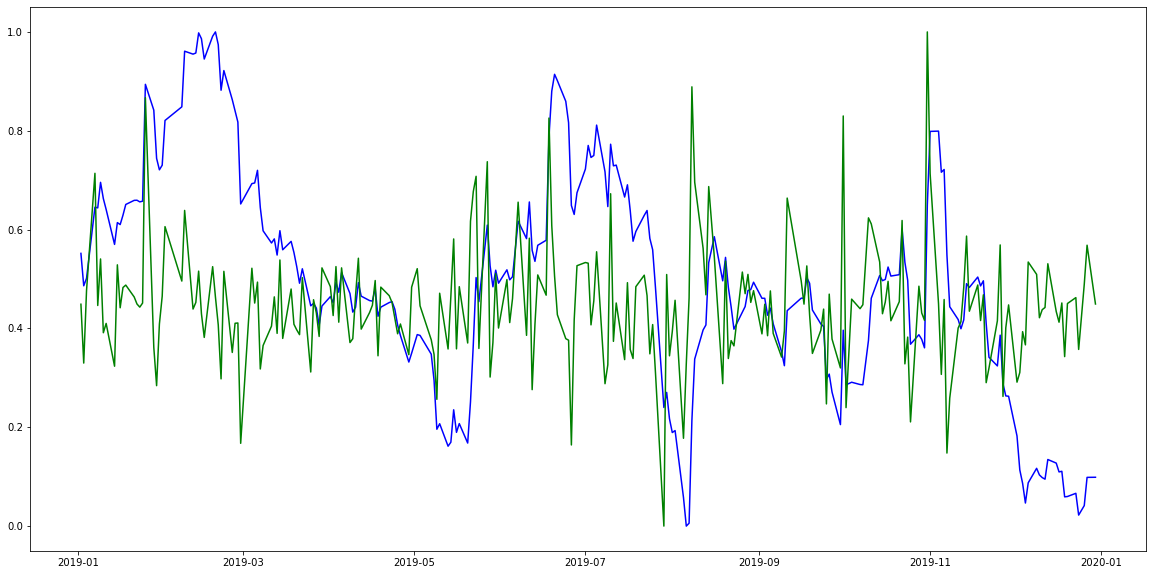

In [126]:
# matplotlib

x = df_marketcap['Date']
y1_scaled = df_scaled[8]
y2_scaled = df_scaled[9]

plt.figure(figsize=(20,10))
plt.plot(x,y1_scaled,'b',x,y2_scaled,'g')

In [140]:
# plotly
# scale 된 값들만 따로 붙여주기
df_plotly = pd.DataFrame({'Date': df_scaler['Date'],'표준화지수':df_scaled[8],'표준화지수변동률': df_scaled[9] })
df_plotly

fig = px.line(df_plotly, x='Date', y=['표준화지수','표준화지수변동률'])
fig.update_xaxes(rangeslider_visible=True)
fig.show()                

## 다음날 아침 급등주 캐치 전략

In [75]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,5760,5880,5650,5650,22922,-0.013962
2019-01-03,5650,5900,5620,5730,37716,0.014159
2019-01-04,5770,5770,5590,5690,37358,-0.006981
2019-01-07,5730,5870,5700,5800,35747,0.019332
2019-01-08,5940,6340,5860,6200,178631,0.068966


In [78]:
# 전날 종가 다음날 고가 변동률

diff_history = dict()

for code in codes_fire:
    df = fdr.DataReader(code,'2019-01-02', '2019-12-31')
    diff_history[code]= df['Change']   # 회사코드: [과거주가 리스트] 

df_diff = pd.DataFrame(diff_history)
df_diff

,014200,067170,074610,083640,033540,010040,041440
Date,,,,,,,
2019-01-02,0.000000,0.023810,-0.038869,0.000000,0.018182,-0.059783,-0.013962
2019-01-03,0.000000,0.013953,0.000000,-0.047945,-0.023214,0.021195,0.014159
2019-01-04,0.024048,0.036697,0.042279,0.017986,-0.018282,-0.001887,-0.006981
2019-01-07,-0.007828,0.000000,0.169312,0.000000,0.018622,0.068053,0.019332
2019-01-08,0.001972,0.013274,-0.072398,0.028269,0.012797,-0.017699,0.068966
...,...,...,...,...,...,...,...
2019-12-23,-0.017429,0.017937,-0.035135,-0.036918,0.030635,-0.025579,-0.002227
2019-12-24,-0.024390,-0.008811,-0.008403,-0.031111,-0.010616,-0.020000,-0.006696
2019-12-26,0.031818,0.017778,0.032486,0.028670,-0.017167,0.019133,-0.004494


In [ ]:
# 구제역 관련주
# 대체식품(수산업,닭)
: 한성기업,정다운,동우팜투테이블,사조오양, 
신라교역, 마니커, 동원산업 
신라에스지 
하림 
동원수산 
이지홀딩스
팜스토리


# 사료
한일사료

# 백신
우성사료 우진비앤지 대성미생물 

# 석회
태경비케이 



In [ ]:
# ai 관련주(주로 백신) : ai가 길어지면 대체식품주 오를 수 있음

파루
제일바이오
이글벳
진원생명과학
팜스웰바이오
씨티씨바이오
대한뉴팜

